<a href="https://colab.research.google.com/github/charan-ivesk/charan-ivesk/blob/main/MOS_LAB3_Orgnaizd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sp
from sympy.geometry import Point, Polygon
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Circle
from itertools import combinations
from sympy import symbols, sin, cos, atan2, Eq, solve, sqrt
from sympy import init_printing
from scipy.optimize import minimize
from scipy.spatial.distance import cdist
from IPython.display import display

In [ ]:
init_printing()

In [ ]:
radius=600

In [ ]:
def RSSI_to_meters(rssi, max_rssi):
    meter=(max_rssi-rssi)*radius/(max_rssi-1)
    return meter

In [ ]:
df = pd.DataFrame(data=[
 [12801,10.0,59,1450.0,1040.0],
 [12801,53.0,61,936.0,752.0],
 [12801,36.0,61,850.0,600.0],
 [12801,176.0,251,827.2,850.4],
 [12801,201.0,251,904.0,728.0],
 [12802,108.0,251,1468.0,2716.8],
 [12804,9.0,251,219.2,2000.0],
 [0,0.0,251,339.2,2614.4],
 [12801,10.0,61,784.0,1262.0],
 [12802,24.0,61,1720.0,2050.0],
 [12803,8.0,61,1720.0,2050.0],
 [12802,87.0,251,1984.0,2313.6],
 [12803,17.0,251,2216.0,2118.4],
 [12804,70.0,251,800.0,2434.4],
 [0,0.0,251,161.6,2748.8],
 ],columns=["CI", "RSSI","Maximum RSSI", "XCoordinate","YCoordinate"])


In [ ]:
df

,CI,RSSI,Maximum RSSI,XCoordinate,YCoordinate
0,12801,10.0,59,1450.0,1040.0
1,12801,53.0,61,936.0,752.0
2,12801,36.0,61,850.0,600.0
3,12801,176.0,251,827.2,850.4
4,12801,201.0,251,904.0,728.0
5,12802,108.0,251,1468.0,2716.8
6,12804,9.0,251,219.2,2000.0
7,0,0.0,251,339.2,2614.4
8,12801,10.0,61,784.0,1262.0
9,12802,24.0,61,1720.0,2050.0


In [ ]:
df["Range of BS"] = df.apply(lambda row: RSSI_to_meters(row["RSSI"], row["Maximum RSSI"]), axis=1)

In [ ]:
df

,CI,RSSI,Maximum RSSI,XCoordinate,YCoordinate,Range of BS
0,12801,10.0,59,1450.0,1040.0,506.896552
1,12801,53.0,61,936.0,752.0,80.000000
2,12801,36.0,61,850.0,600.0,250.000000
3,12801,176.0,251,827.2,850.4,180.000000
4,12801,201.0,251,904.0,728.0,120.000000
5,12802,108.0,251,1468.0,2716.8,343.200000
6,12804,9.0,251,219.2,2000.0,580.800000
7,0,0.0,251,339.2,2614.4,602.400000
8,12801,10.0,61,784.0,1262.0,510.000000
9,12802,24.0,61,1720.0,2050.0,370.000000


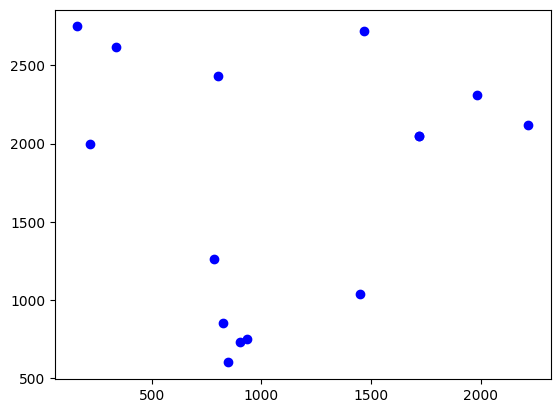

In [ ]:
plt.scatter(df["XCoordinate"], df["YCoordinate"], color='blue')

In [ ]:
x_values = df['XCoordinate']
y_values = df['YCoordinate']

In [ ]:
newdf=df[['CI','XCoordinate','YCoordinate','Range of BS']]

In [ ]:
newdf

,CI,XCoordinate,YCoordinate,Range of BS
0,12801,1450.0,1040.0,506.896552
1,12801,936.0,752.0,80.000000
2,12801,850.0,600.0,250.000000
3,12801,827.2,850.4,180.000000
4,12801,904.0,728.0,120.000000
5,12802,1468.0,2716.8,343.200000
6,12804,219.2,2000.0,580.800000
7,0,339.2,2614.4,602.400000
8,12801,784.0,1262.0,510.000000
9,12802,1720.0,2050.0,370.000000


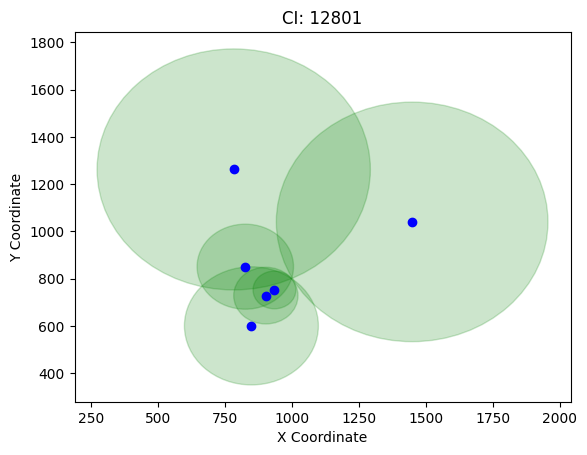

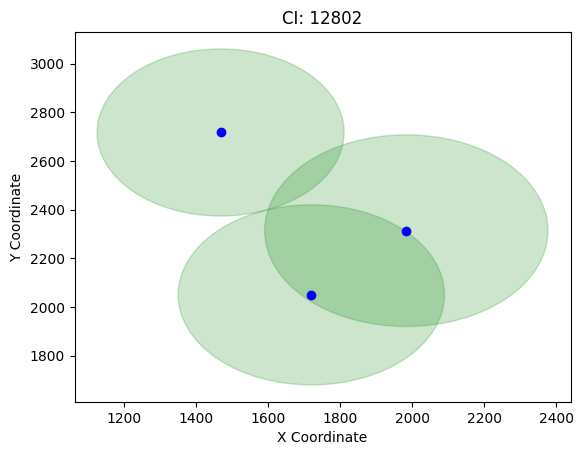

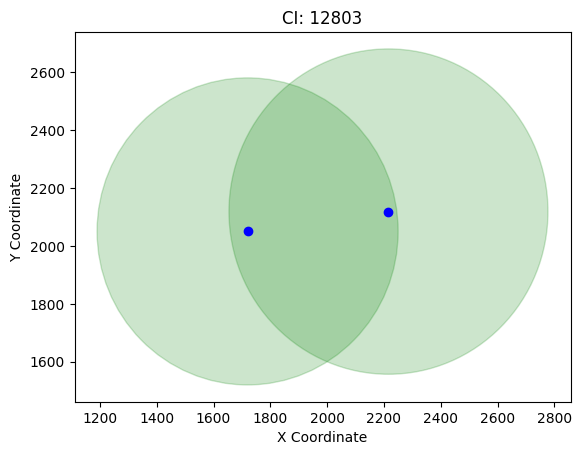

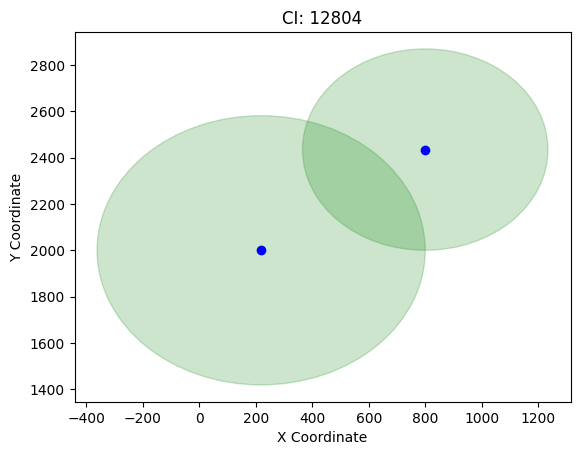

In [ ]:
grouped_df = newdf.groupby('CI')

for ci, group in grouped_df:
    if ci == 0:
      continue

    x_coordinates = group['XCoordinate']
    y_coordinates = group['YCoordinate']
    ranges = group['Range of BS']

    fig, ax = plt.subplots()
    for x, y, r in zip(x_coordinates, y_coordinates, ranges):
        ax.scatter(x, y, color='blue', zorder=10)
        ax.add_patch(Circle((x, y), r,color='green', alpha=0.2))

    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title('CI: {}'.format(ci))

    plt.show()

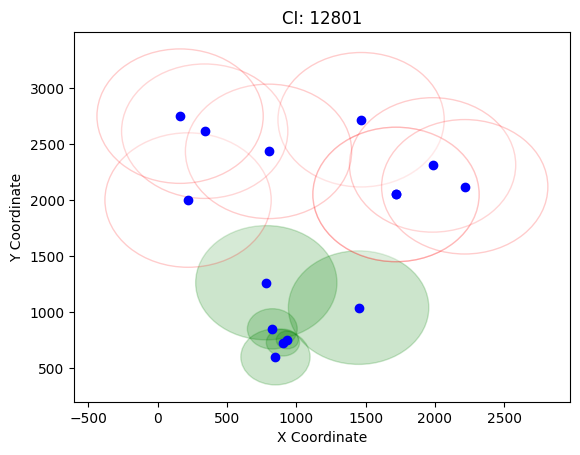

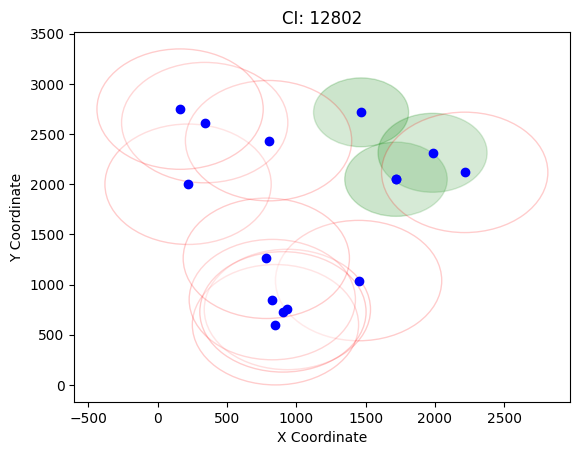

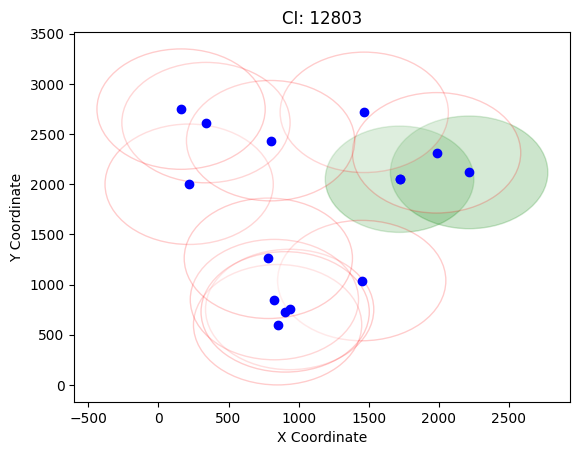

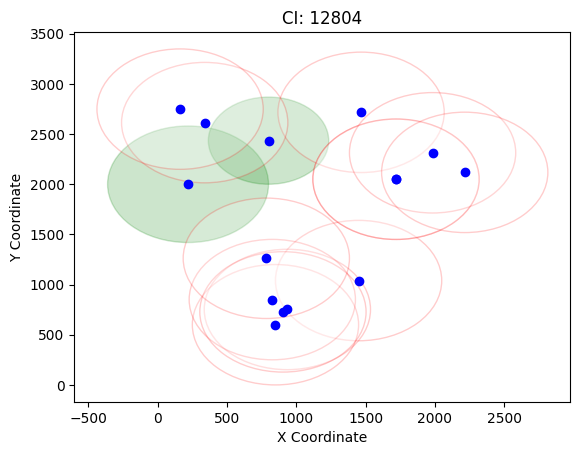

In [ ]:

grouped_df = newdf.groupby('CI')

for ci, group in grouped_df:
    if ci == 0:
      continue
    x_coordinates = group['XCoordinate']
    y_coordinates = group['YCoordinate']
    ranges = group['Range of BS']


    fig, ax = plt.subplots()
    for _, row in newdf.iterrows():
        ax.scatter(row['XCoordinate'], row['YCoordinate'], color='blue', zorder=10)

    for x, y, r in zip(x_coordinates, y_coordinates, ranges):
        ax.add_patch(Circle((x, y), r, color='green', alpha=0.2))

    usedf=newdf
    mask = (usedf['XCoordinate'].isin(x_coordinates)) & (usedf['YCoordinate'].isin(y_coordinates))
    usedf = usedf[~mask]

    non_group_coordinates = usedf[(usedf['CI'] != ci) ]
    non_group_x = non_group_coordinates['XCoordinate']
    non_group_y = non_group_coordinates['YCoordinate']

    for x, y in zip(non_group_x, non_group_y):
        ax.add_patch(Circle((x, y), 600, facecolor='white', edgecolor='red', alpha=0.2))


    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title('CI: {}'.format(ci))
    plt.show()



In [ ]:
import plotly.graph_objects as go

grouped_df = newdf.groupby('CI')

for ci, group in grouped_df:
    if ci == 0:
      continue
    x_coordinates = group['XCoordinate']
    y_coordinates = group['YCoordinate']
    ranges = group['Range of BS']

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=newdf['XCoordinate'],
        y=newdf['YCoordinate'],
        mode='markers',
        marker=dict(color='blue', size=5),
        name='All Coordinates'
    ))

    for x, y, r in zip(x_coordinates, y_coordinates, ranges):
        fig.add_shape(type='circle',
                      xref='x', yref='y',
                      x0=x - r, y0=y - r,
                      x1=x + r, y1=y + r,
                      line=dict(color='red', width=1, dash='dash'),
                      fillcolor='red', opacity=0.2)


    # Remove similar coordinates
    usedf=newdf
    mask = (usedf['XCoordinate'].isin(x_coordinates)) & (usedf['YCoordinate'].isin(y_coordinates))
    usedf = usedf[~mask]

    # Find the coordinates that are not part of the group
    non_group_coordinates = usedf[(usedf['CI'] != ci)]
    non_group_x = non_group_coordinates['XCoordinate']
    non_group_y = non_group_coordinates['YCoordinate']

    # Add circles of range 600 around the non-group coordinates
    for x, y in zip(non_group_x, non_group_y):
        fig.add_shape(type='circle',
                      xref='x', yref='y',
                      x0=x - 600, y0=y - 600,
                      x1=x + 600, y1=y + 600,
                      line=dict(color='cyan', width=1, dash='dash'),
                      fillcolor='white', opacity=0.2)

    fig.update_layout(
        xaxis=dict(title='X Coordinate', range=(-600,3600)),
        yaxis=dict(title='Y Coordinate', range=(-600,3600)),
        width=600,
        height=600,
        title='CI: {}'.format(ci),
        showlegend=True
    )


    hover_text = ['({:.2f}, {:.2f})'.format(x, y) for x, y in zip(newdf['XCoordinate'], newdf['YCoordinate'])]
    fig.data[0].hovertext = hover_text

    fig.show()

# **`Mathematical way`**

In [ ]:
def distance_finder(p1,p2):
    x1, y1 = p1[0], p1[1]
    x2, y2 = p2[0], p2[1]
    distance = sqrt((x2 - x1)**2 + (y2 - y1)**2)

    return distance

In [ ]:
def multi_intersection_finder(df, rest_df):
  test=[]
  x1, y1 = symbols('x1 y1', real=True)
  for i in range(len(df)):
    r = df.iloc[i]['Range of BS']
    xm1, ym1 = df.iloc[i]['XCoordinate'], df.iloc[i]['YCoordinate']
    test.append(Eq((x1 - xm1) ** 2 + (y1 - ym1) ** 2, r ** 2))
    display(Eq((x1 - xm1) ** 2 + (y1 - ym1) ** 2, r ** 2))
  ans = solve(test, (x1, y1))
  print(ans)

  return BS_rule_out(rest_df,ans)

In [ ]:
def BS_rule_out(df,ans):
  filtered_points = [point for point in ans if all(distance_finder(point, df_point) > radius for df_point in df[['XCoordinate','YCoordinate']].itertuples(index=False))]
  return filtered_points

In [ ]:
def intersection_finder(df):

    coordinates = list(zip(df['XCoordinate'], df['YCoordinate'], df['Range of BS']))
    ans=[]
    for combo in combinations(coordinates, 3):
        test = []
        x1, y1 = symbols('x1 y1', real=True)
        (xm1, ym1, r1), (xm2, ym2, r2), (xm3, ym3, r3) = combo
        test.append(Eq((x1 - xm1) ** 2 + (y1 - ym1) ** 2, r1 ** 2))
        test.append(Eq((x1 - xm2) ** 2 + (y1 - ym2) ** 2, r2 ** 2))
        test.append(Eq((x1 - xm3) ** 2 + (y1 - ym3) ** 2, r3 ** 2))
        display(test)
        result=solve(test, (x1, y1))
        if result !=[]:
          ans.append(result[0])
    return ans

In [ ]:
def bounds_finder(data):
    highest_positive_x = data['XCoordinate'].max() + 600.0
    lowest_negative_x = data['XCoordinate'].min() - 600.0
    lowest_negative_y = data['YCoordinate'].min() - 600.0
    highest_positive_y = data['YCoordinate'].max() + 600.0

    return [(lowest_negative_x, highest_positive_x), (lowest_negative_y, highest_positive_y)]


In [ ]:
def opt_function(point, circles):
    total_diff = 0
    for circle in circles:
        center = circle[0]
        radius = circle[1]
        diff = np.linalg.norm(point - center) - radius
        total_diff += np.abs(diff)
    return total_diff

In [ ]:
def intersection_optimizer(circles, bounds):
    initial_guess = np.zeros(2)  # Initial guess for the optimization
    result = minimize(opt_function, initial_guess, args=(circles), bounds=bounds)

    return result.x


In [ ]:
def create_circles_for_opti(current_df):
  circles = []
  for i, row in current_df.iterrows():
    circle = (np.array([row['XCoordinate'], row['YCoordinate']]), row['Range of BS'])
    circles.append(circle)
  return circles

In [ ]:
bounds=bounds_finder(newdf)

# **12801**

In [ ]:
circles=create_circles_for_opti(newdf[(newdf['CI'] == 12801)])
print(circles)
midpoint=intersection_optimizer(circles,bounds)

[(array([1450., 1040.]), 506.8965517241379), (array([936., 752.]), 80.0), (array([850., 600.]), 250.0), (array([827.2, 850.4]), 180.0), (array([904., 728.]), 120.0), (array([ 784., 1262.]), 510.0)]


In [ ]:
midpoint

array([1000.,  800.])

In [ ]:
ans=intersection_finder(newdf[(newdf['CI'] == 12801)])

In [ ]:
ans

[(1000.0, 800.0)]

# **12802**

In [ ]:
circles=create_circles_for_opti(newdf[(newdf['CI'] == 12802)])
print(circles)
midpoint=intersection_optimizer(circles,bounds)

[(array([1468. , 2716.8]), 343.2), (array([1720., 2050.]), 370.0), (array([1984. , 2313.6]), 393.6)]


In [ ]:
midpoint

array([1599.99999999, 2399.99999999])

Using Intersection FInder

# **12803**

In [ ]:
current_df=newdf[(newdf['CI'] == 12803)]
rest_df=newdf[(newdf['CI'] != 12803)]
mask = (rest_df['XCoordinate'].isin(current_df['XCoordinate'])) & (rest_df['YCoordinate'].isin(current_df['YCoordinate']))
rest_df=rest_df[~mask]

In [ ]:
ans=multi_intersection_finder(current_df,rest_df)

NameError: name 'multi_intersection_finder' is not defined

In [ ]:
ans

[(2000.0, 1600.0)]

In [ ]:
current_df=newdf[(newdf['CI'] == 12804)]
rest_df=newdf[(newdf['CI'] != 12804)]
mask = (rest_df['XCoordinate'].isin(current_df['XCoordinate'])) & (rest_df['YCoordinate'].isin(current_df['YCoordinate']))
rest_df=rest_df[~mask]

In [ ]:
ans=multi_intersection_finder(current_df,rest_df)

NameError: name 'multi_intersection_finder' is not defined

In [ ]:
ans

[(800.0, 2000.0)]

# **In case range was not given**

Incase the range of the base staion is not given we compute the range using the values of rssi and eucleadian distance.
i.e Change in distance/change in ratio


In [ ]:
def Standardize(rssi,max_rssi):
  ratio= (max_rssi-rssi)/(max_rssi)
  return ratio

In [ ]:
df["Standardized RSSI"] = df.apply(lambda row: Standardize(row["RSSI"], row["Maximum RSSI"]), axis=1)

In [ ]:
df

,CI,RSSI,Maximum RSSI,XCoordinate,YCoordinate,Range of BS,Standardized RSSI
0,12801,10.0,59,1450.0,1040.0,506.896552,0.830508
1,12801,53.0,61,936.0,752.0,80.000000,0.131148
2,12801,36.0,61,850.0,600.0,250.000000,0.409836
3,12801,176.0,251,827.2,850.4,180.000000,0.298805
4,12801,201.0,251,904.0,728.0,120.000000,0.199203
5,12802,108.0,251,1468.0,2716.8,343.200000,0.569721
6,12804,9.0,251,219.2,2000.0,580.800000,0.964143
7,0,0.0,251,339.2,2614.4,602.400000,1.000000
8,12801,10.0,61,784.0,1262.0,510.000000,0.836066
9,12802,24.0,61,1720.0,2050.0,370.000000,0.606557


In [ ]:
current_df=df[df['CI'] ==12801]

In [ ]:
rest_df=df[(df['CI'] != 12801)]

In [ ]:
mask = (rest_df['XCoordinate'].isin(current_df['XCoordinate'])) & (rest_df['YCoordinate'].isin(current_df['YCoordinate']))

In [ ]:
rest_df=rest_df[~mask]

In [ ]:
current_df[['CI','XCoordinate','YCoordinate','Standardized RSSI']]

,CI,XCoordinate,YCoordinate,Standardized RSSI
0,12801,1450.0,1040.0,0.830508
1,12801,936.0,752.0,0.131148
2,12801,850.0,600.0,0.409836
3,12801,827.2,850.4,0.298805
4,12801,904.0,728.0,0.199203
8,12801,784.0,1262.0,0.836066


In [ ]:
SP1 = pd.DataFrame(data=[
 [100045,1450.0,1040.0],
 [100230,936.0,752.0],
 [110002,850.0,600.0],
 ],columns=["time", "XCoordinate","YCoordinate"])


In [ ]:
SP1

,time,XCoordinate,YCoordinate
0,100045,1450.0,1040.0
1,100230,936.0,752.0
2,110002,850.0,600.0


In [ ]:
delta=10

In [ ]:
def delta_sub(r):
    return r-delta

In [ ]:
def delta_add(r):
    return r+delta

In [ ]:
df["Plus Delta"] = df.apply(lambda row: delta_add(row["Range of BS"]), axis=1)

In [ ]:
df["Minus Delta"] = df.apply(lambda row: delta_sub(row["Range of BS"]), axis=1)

In [ ]:
df

,CI,RSSI,Maximum RSSI,XCoordinate,YCoordinate,Range of BS,Standardized RSSI,Plus Delta,Minus Delta
0,12801,10.0,59,1450.0,1040.0,506.896552,0.830508,516.896552,496.896552
1,12801,53.0,61,936.0,752.0,80.000000,0.131148,90.000000,70.000000
2,12801,36.0,61,850.0,600.0,250.000000,0.409836,260.000000,240.000000
3,12801,176.0,251,827.2,850.4,180.000000,0.298805,190.000000,170.000000
4,12801,201.0,251,904.0,728.0,120.000000,0.199203,130.000000,110.000000
5,12802,108.0,251,1468.0,2716.8,343.200000,0.569721,353.200000,333.200000
6,12804,9.0,251,219.2,2000.0,580.800000,0.964143,590.800000,570.800000
7,0,0.0,251,339.2,2614.4,602.400000,1.000000,612.400000,592.400000
8,12801,10.0,61,784.0,1262.0,510.000000,0.836066,520.000000,500.000000
9,12802,24.0,61,1720.0,2050.0,370.000000,0.606557,380.000000,360.000000


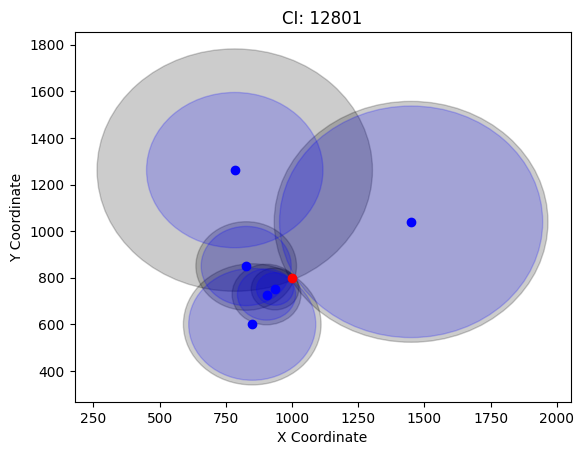

In [ ]:
# Iterate over the groups and create separate plots
newdf=df[df['CI'] ==12801]
# Access the required columns in the group
x_coordinates = newdf['XCoordinate']
y_coordinates = newdf['YCoordinate']
ranges = newdf['Plus Delta']

# Create a scatter plot of the points and circles
fig, ax = plt.subplots()
for x, y, r in zip(x_coordinates, y_coordinates, ranges):
    ax.scatter(x, y, color='blue', zorder=10)
    ax.add_patch(Circle((x, y), r,color='black', alpha=0.2))

x_coordinates = newdf['XCoordinate']
y_coordinates = newdf['YCoordinate']
ranges = df['Minus Delta']
for x, y, r in zip(x_coordinates, y_coordinates, ranges):
    ax.add_patch(Circle((x, y), r,color='blue', alpha=0.2))

ax.scatter(1000, 800, color='red', zorder=10)

# Mark the points of intersection
# for point in points_of_intersection:
#     ax.scatter(point[0], point[1], color='green', zorder=10)

# Set the axis labels and plot title
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('CI: 12801')

# Show the plot
plt.show()

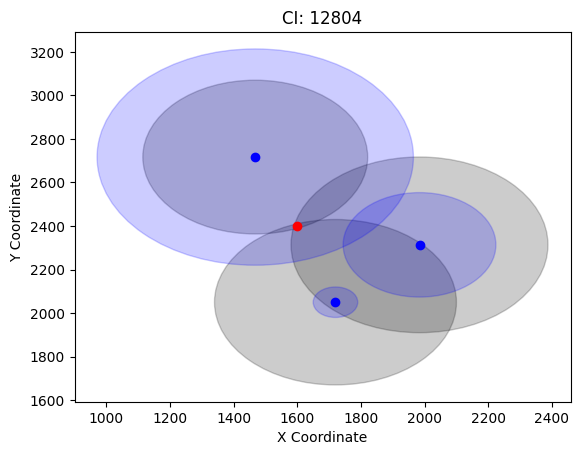

In [ ]:
# Iterate over the groups and create separate plots
newdf=df[df['CI'] ==12802]

# Access the required columns in the group
x_coordinates = newdf['XCoordinate']
y_coordinates = newdf['YCoordinate']
ranges = newdf['Plus Delta']

# Create a scatter plot of the points and circles
fig, ax = plt.subplots()
for x, y, r in zip(x_coordinates, y_coordinates, ranges):
    ax.scatter(x, y, color='blue', zorder=10)
    ax.add_patch(Circle((x, y), r,color='black', alpha=0.2))

x_coordinates = newdf['XCoordinate']
y_coordinates = newdf['YCoordinate']
ranges = df['Minus Delta']
for x, y, r in zip(x_coordinates, y_coordinates, ranges):
    ax.add_patch(Circle((x, y), r,color='blue', alpha=0.2))

ax.scatter(1600, 2400, color='red', zorder=10)



# Set the axis labels and plot title
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('CI: {}'.format(ci))

# Show the plot
plt.show()

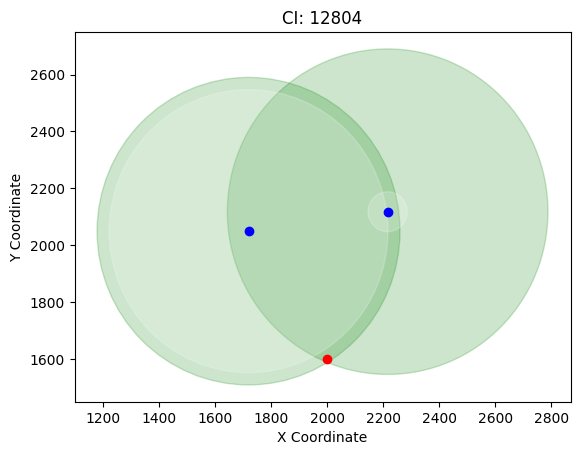

In [ ]:
# Iterate over the groups and create separate plots
newdf=df[df['CI'] ==12803]
# Access the required columns in the group
x_coordinates = newdf['XCoordinate']
y_coordinates = newdf['YCoordinate']
ranges = newdf['Plus Delta']

# Create a scatter plot of the points and circles
fig, ax = plt.subplots()
for x, y, r in zip(x_coordinates, y_coordinates, ranges):
    ax.scatter(x, y, color='blue', zorder=10)
    ax.add_patch(Circle((x, y), r,color='green', alpha=0.2))

x_coordinates = newdf['XCoordinate']
y_coordinates = newdf['YCoordinate']
ranges = df['Minus Delta']
for x, y, r in zip(x_coordinates, y_coordinates, ranges):
    ax.add_patch(Circle((x, y), r,color='white', alpha=0.2))

ax.scatter(2000, 1600, color='red', zorder=10)

# Mark the points of intersection
# for point in points_of_intersection:
#     ax.scatter(point[0], point[1], color='green', zorder=10)

# Set the axis labels and plot title
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('CI: {}'.format(ci))

# Show the plot
plt.show()

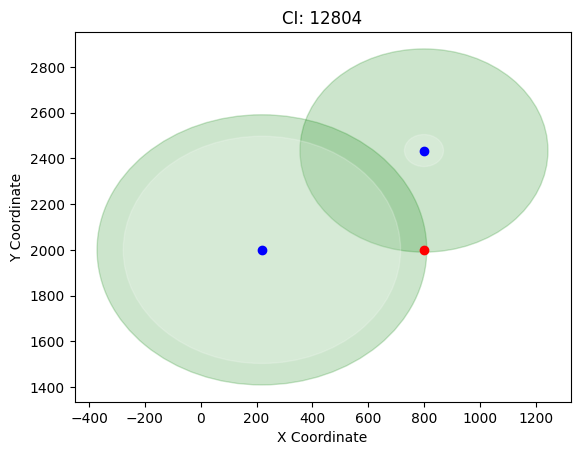

In [ ]:
# Iterate over the groups and create separate plots
newdf=df[df['CI'] ==12804]
# Access the required columns in the group
# Access the required columns in the group
x_coordinates = newdf['XCoordinate']
y_coordinates = newdf['YCoordinate']
ranges = newdf['Plus Delta']

# Create a scatter plot of the points and circles
fig, ax = plt.subplots()
for x, y, r in zip(x_coordinates, y_coordinates, ranges):
    ax.scatter(x, y, color='blue', zorder=10)
    ax.add_patch(Circle((x, y), r,color='green', alpha=0.2))

x_coordinates = newdf['XCoordinate']
y_coordinates = newdf['YCoordinate']
ranges = df['Minus Delta']
for x, y, r in zip(x_coordinates, y_coordinates, ranges):
    ax.add_patch(Circle((x, y), r,color='white', alpha=0.2))

ax.scatter(800, 2000, color='red', zorder=10)

# Mark the points of intersection
# for point in points_of_intersection:
#     ax.scatter(point[0], point[1], color='green', zorder=10)

# Set the axis labels and plot title
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('CI: {}'.format(ci))

# Show the plot
plt.show()